<a href="https://colab.research.google.com/github/PedroHGMS/rna_trabalho_final/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
proj_path = 'drive/MyDrive/rna/trabalho_final/'

Mounted at /content/drive


In [3]:
pip install import_ipynb ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importando funções que carregam os datasets
import import_ipynb
import ipynb
import sys, os
sys.path.append(os.path.abspath(proj_path+'Datasets/'))
from ipynb.fs.full.load_datasets import *

In [5]:
# Funções gerais

def normalize(X):
    return (X-np.min(X,0))/(np.max(X,0)-np.min(X,0))

def print_dictionary(d):
  for k in d.keys():
    if type(d[k]) == np.ndarray:
      print(f"{k}.shape: {d[k].shape}")
    elif type(d[k])==int:
      print(f"{k}: {d[k]:.3E}")
    else:
      print(f"{k}: {d[k]}")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
import math
import time
import csv
from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback
from scipy.stats import multivariate_normal
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import clear_output

In [7]:
import tensorflow as tf
from tensorflow import keras

In [85]:
# Definição de funções


def split_dataset(X, Y, ratio):
  '''
    Separa X e Y de acordo com os ratio passado.
    input:
      X: um np.ndarray (N, d)
      Y: um np.ndarray (N, 1)
      ratio: uma lista ou ndarray com 2 ou 3 valores
    output:
      Um dicionário com a divisão de X e Y em 'train' e 'test', se ratio tiver 2 valores,
      ou 'train', 'val' e 'test'
  '''
  return_dict = {}
  ratio = np.array(ratio)

  # Confere valores de entrada
  if (not (np.isclose(ratio.sum(), 1))) or (ratio.shape[0]==0) or (ratio.shape[0]>=4):
    print('Erro: Ratio deve ter 2 ou 3 valores e a soma dos valores deve ser igual a 1.')
    return {}

  # Número de amostras e dimensão de entrada
  N, d = X.shape

  # Faz as permutações, para embaralhar X e Y de forma igual
  permutations = np.random.permutation(X.shape[0])

  # Valores do limite entre cada partição
  ratio_indices = (N*ratio.cumsum()).astype(int)

  # Divisão de treino
  return_dict['X_train'] = X[permutations[0:ratio_indices[0]]]
  return_dict['Y_train'] = X[permutations[0:ratio_indices[0]]]

  # Divisão
  if(ratio.shape[0]==2):
    return_dict['X_test'] = X[permutations[ratio_indices[0]:ratio_indices[1]]]
    return_dict['Y_test'] = X[permutations[ratio_indices[0]:ratio_indices[1]]]
  elif(ratio.shape[0]==3):
    return_dict['X_val'] = X[permutations[ratio_indices[0]:ratio_indices[1]]]
    return_dict['Y_val'] = X[permutations[ratio_indices[0]:ratio_indices[1]]]

    return_dict['X_test'] = X[permutations[ratio_indices[1]:ratio_indices[2]]]
    return_dict['Y_test'] = X[permutations[ratio_indices[1]:ratio_indices[2]]]
  return return_dict

def split_k_fold(X, Y, k=10):
  '''
    Divide X e Y em k folds, não aleatoriza
    Retorna uma tuple com arrays
  '''
  # Número de amostras e dimensão de entrada
  N, d = X.shape
  
  # limite entre cada fold em indices
  lim = np.linspace(0, N, k+1).astype(int)
  
  X_array = []
  Y_array = []
  for i in range(k):
    idx = np.array(range(lim[i],lim[i+1]))
    X_array.append(X[idx])
    Y_array.append(Y[idx])
  return (X_array, Y_array)

In [111]:
# Funções do k-fold

def kfold(dataset, k=10, ratio=[.7, .3]):
  '''
    Calcula o erro de validação k-fold para um dataset
    inputs:
      model: modelo não treinado do keras
      dataset: dicionário com X e Y
      ratio = divisão entre o dataset de treinamento e teste
    output:

  '''
  # Recuperando dataset
  X = dataset['X']
  Y = dataset['Y']
  task = dataset['task']
  name = dataset['name']

  # Número de amostras e dimensão de entrada
  N, d = X.shape

  # Sepração entre treino e teste
  dataset_separado =  split_dataset(X, Y, ratio = ratio)
  X_test, Y_test = dataset_separado['X_test'], dataset_separado['Y_test']
  X_train, Y_train = dataset_separado['X_train'], dataset_separado['Y_train']

  # k-fold
  # Separação dos k-folds
  X_folds, Y_folds = split_k_fold(X=X_train, Y=Y_train, k=k)

  # Loop para usar cada fold para validação de cada vez
  for i in range(k):
    # Separação dos indices de cada k-fold (valores de 0 a k)
    fold_idx = list(range(k))
    val_idx = fold_idx.pop(i)
    train_idx = fold_idx

    # Separação de cada k-fold e transformando em um np.ndarray
    X_train_folds = np.concatenate([X_folds[e] for e in train_idx])
    X_val_fold = X_folds[val_idx]

    # Treinamento com X_train_folds

    # Validação com X_val_fold

  # Teste com X_test
    
  return

# Testes da função K-fold
# Definindo entradas da função
dataset = load_dataset_5()
dataset['X'] = normalize(dataset['X'])
k = 10
split = [.8, .2]

# Printando os dataset
print('Dataset:')
print_dictionary(dataset)
print('#'*30)

kfold(dataset, k=10, ratio=[.8, .2])

Dataset:
X.shape: (414, 7)
Y.shape: (414, 1)
task: regression
name: Real Estate
##############################


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Exception ignored in: <function tqdm.__del__ at 0x7f1d805de560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/tqdm/notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


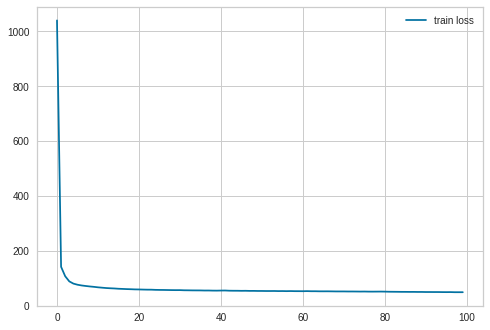

In [44]:
model = keras.Sequential([
    keras.layers.Input(shape=(7)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Otimizadores
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999
)

sgd = tf.keras.optimizers.SGD(
    learning_rate=0.001
)

# Learning Rate


model.compile(optimizer=adam,
              loss='mse')

# history = model.fit(dataset['X'], dataset['Y'], epochs=1000, validation_split=0.33, verbose=0)
history = model.fit(dataset['X'], dataset['Y'], epochs=1000, verbose=0, callbacks=[TqdmCallback(verbose=1)])

plt.plot(np.array(history.history['loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='train loss')
# plt.plot(np.array(history.history['val_loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='val loss')
plt.legend()

In [ ]:
N = 100
X = np.linspace(-5,5,N).reshape(-1,1)
Y = np.sin(X).reshape(-1, 1) + np.random.normal(scale=0.2, size=100).reshape(-1,1)

plt.plot(X,np.sin(X))
plt.scatter(X,Y)
X.shape, Y.shape

((20, 1), (20, 1))

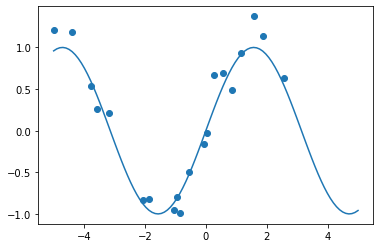

In [ ]:
permutations = np.random.permutation(X.shape[0])

slice_size = 20
X_slice = X[permutations[0:slice_size]]
Y_slice = Y[permutations[0:slice_size]]

plt.plot(X,np.sin(X))
plt.scatter(X_slice,Y_slice)
X_slice.shape, Y_slice.shape

In [ ]:
# Treina vários modelos
num_it = 200
num_modelos = 10
models = []
histories = []

for _ in tqdm(range(num_modelos)):
  model = keras.Sequential([
      keras.layers.Input(shape=(1)),
      keras.layers.Dense(30, activation='tanh'),
      keras.layers.Dense(1, activation='linear')
  ])

  model.compile(optimizer='sgd',
                loss='mse',
                metrics=['mse'])

  history = model.fit(X, Y, epochs=int(num_it), validation_split=0.33, verbose=0)

  models.append(model)
  histories.append(history)

# y_hat = model.predict(X)
# plt.plot(X,y_hat)
# plt.scatter(X,Y)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Avalia os modelos
y_hat = np.zeros((num_modelos, *(Y.shape)))
for i in tqdm(range(num_modelos)):
  y_hat[i] = models[i].predict(X)

  0%|          | 0/10 [00:00<?, ?it/s]

(10, 100, 1)

  0%|          | 0/10 [00:00<?, ?it/s]

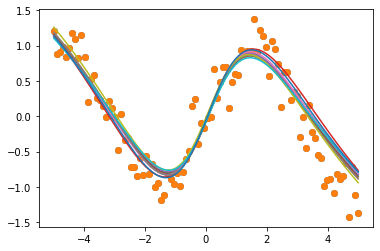

In [ ]:
# Plota resultados médios
y_hat_mean = y_hat.mean(axis=(0,2))
plt.plot(X,y_hat_mean)
plt.scatter(X,Y)

# plotar todos modelos em um grid
for i in tqdm(range(num_modelos)):
  plt.plot(X,y_hat[i])
  plt.scatter(X,Y)
  plt.show()

In [ ]:
num_it = 100
history = model.fit(X, Y, epochs=int(num_it), validation_split=0.33)

y_hat = model.predict(X)
plt.plot(X,y_hat)
plt.scatter(X,Y)
# plt.plot(X,np.sin(X))

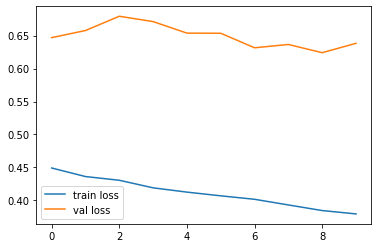

In [ ]:
plt.plot(np.array(history.history['loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='train loss')
plt.plot(np.array(history.history['val_loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='val loss')
plt.legend()